## Image Slice Viewer 

open timeseries file: timeseries_ERA5_ramp_demErr.h5


<IPython.core.display.Javascript object>


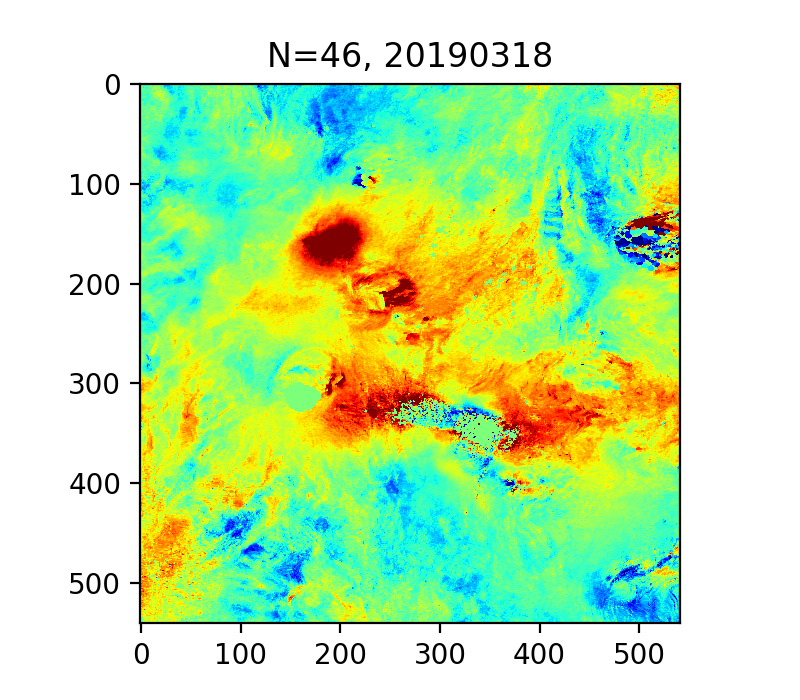

In [1]:
%matplotlib notebook

import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mintpy.objects import timeseries
from mintpy.utils import readfile

class imageSlider():
    def __init__(self, ts_file, idx=10):
        self.ts_file = ts_file
        self.idx = idx

        # read ts_file
        self.ts_obj = timeseries(self.ts_file)
        self.ts_obj.open()
        self.ts_data = readfile.read(self.ts_file)[0] * 100. #cm
        self.numDate = self.ts_obj.numDate
        self.dateList = self.ts_obj.dateList

        # plot
        self.fig, self.ax = plt.subplots(figsize=[4, 3.5])
        self.im = self.ax.imshow(self.ts_data[self.idx, :, :],
                                 vmin=-5, vmax=5, cmap='jet')
        self.ax.set_title('N={}, {}'.format(self.idx, self.dateList[self.idx]))
        self.fig.canvas.mpl_connect('key_press_event', self.on_key_event)
        plt.show()

    def on_key_event(self, event):
        idx = None
        if event.key == "left":
            idx = max(self.idx-1, 0)
        elif event.key == "right":
            idx = min(self.idx+1, self.numDate-1)
        if idx is not None and idx != self.idx:
            self.im.set_data(self.ts_data[idx, :, :])
            self.idx = idx
            self.ax.set_title('N={}, {}'.format(self.idx, self.dateList[self.idx]))
            self.im.axes.figure.canvas.draw()

ts_file = os.path.expanduser("~/insarlab/Kirishima/KirishimaAlos2DT23/mintpy/timeseries_ERA5_ramp_demErr.h5")
imageSlider(ts_file)